In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\veeranna\DATA SCIENCE\Data_sets\Visadataset.xlsx"
visa_df=pd.read_excel(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513.0,2007.0,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444.0,2008.0,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98.0,1897.0,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082.0,2005.0,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601.0,2008.0,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274.0,2006.0,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121.0,1910.0,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918.0,1887.0,West,86154.7700,Year,Y,Certified


**steps in outlier analysis**
- step-1: Find Q1,Q2 and Q3
    -np.percentile(column data,q)
- step-2: calculate the IQR
    - IQR=Q3-Q1
- step-3: Calcutale lower boundary and upper boundary
    - bl: Q1-1.5*IQR
    - ub: Q3-1.5*IQR
- step-4:Find the outlier
    - c1:column data<lb
    - c2:column data>ub
    - c:apply main condition
    - main data[c]    

In [3]:
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q3=np.percentile(visa_df["prevailing_wage"],75)
IQR=Q3-Q1
bl=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
c1=visa_df["prevailing_wage"]<bl
c2=visa_df["prevailing_wage"]>ub
c=c1 | c2 #outliers data
outliers_df=visa_df[c]
outliers_df
# non_oulier_df=visa_df[c1&c2]#non-outlier data
# non_oulier_df (to get this change the conditions as c1=visa_df["prevailing_wage"]>lb and c2=visa_df["prevailing_wage"]<ub)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756.0,2006.0,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809.0,2010.0,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554.0,2005.0,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515.0,2001.0,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518.0,2010.0,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983.0,2005.0,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47.0,2001.0,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373.0,2005.0,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261.0,1997.0,Northeast,273772.47,Year,N,Certified


In [4]:
c1=visa_df["prevailing_wage"]>bl 
c2=visa_df["prevailing_wage"]<ub
non_outliers_df=visa_df[c1&c2]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513.0,2007.0,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444.0,2008.0,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98.0,1897.0,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082.0,2005.0,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594.0,1979.0,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601.0,2008.0,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121.0,1910.0,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918.0,1887.0,West,86154.7700,Year,Y,Certified


**compare original data with non outlairs data**

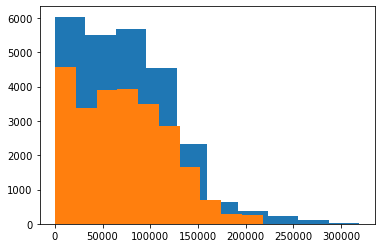

In [5]:
plt.hist(visa_df["prevailing_wage"])
plt.hist(non_outliers_df["prevailing_wage"])
plt.show()

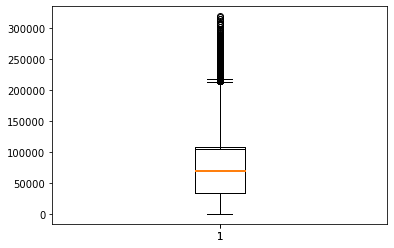

In [6]:
plt.boxplot(visa_df["prevailing_wage"])
plt.boxplot(non_outliers_df["prevailing_wage"])
plt.show()

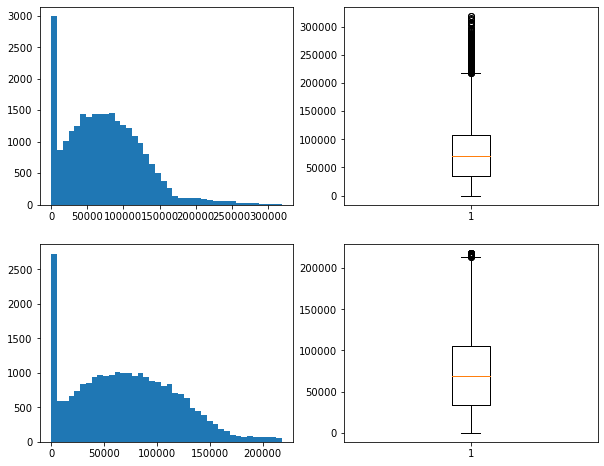

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3)
plt.hist(non_outliers_df["prevailing_wage"],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df["prevailing_wage"])
plt.show()

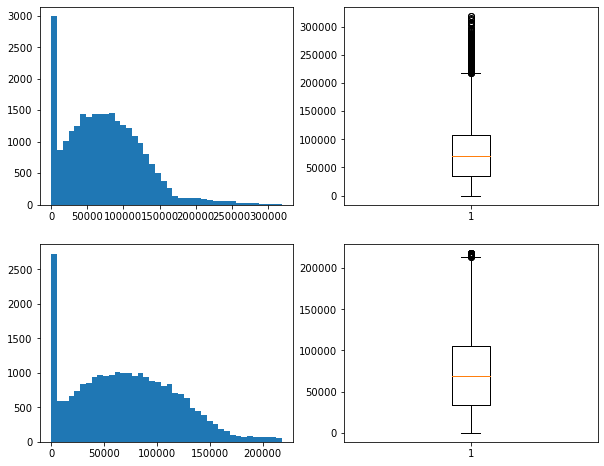

In [8]:
#other way of doing
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2).boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3).hist(non_outliers_df["prevailing_wage"],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df["prevailing_wage"])
plt.show()

# How to deal with outliers

**Drop the outliers**

    - we can drop the outliers if outlier percentage is less than 2%
    - But this is not recomended, we lost other column data
**Impute with Median values**

    - As we know that Median does not affect by outliers
    - So it is good practice we can impute outliers with Median value
**Cap with Q3 or Q1 values**

    - if outliers are present less than lower bound then fill Q1
    - if outliers are present more than upper bound then fill Q3

In [9]:
#Task-3
#Read the each observation from prevailing_wage
#if that observation <lb or >ub:fill with median value
#else: keep as it is

#take empty list=[]
#median=visa_df["prevailing_wage"]
#for i in visa_df["prevailng_wage"]:
#     if i<lb or i>ub:
#       emptylist.append(median)
#     else:
#       emptylist.append(i)

In [10]:
#task-3
observation=visa_df["prevailing_wage"]
elist=[]
median=np.median(visa_df["prevailing_wage"])
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q3=np.percentile(visa_df["prevailing_wage"],75)
IQR=Q3-Q1
bl=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
# c1=visa_df["prevailing_wage"]<bl
# c2=visa_df["prevailing_wage"]>ub
for i in observation:
    if i<bl or i>ub:
        elist.append(median)
    else:
        elist.append(i)
len(elist) 

25480

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
observation=visa_df["prevailing_wage"]
elist=[]
median=np.median(visa_df["prevailing_wage"])
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q3=np.percentile(visa_df["prevailing_wage"],75)
IQR=Q3-Q1
bl=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
# c1=visa_df["prevailing_wage"]<bl
# c2=visa_df["prevailing_wage"]>ub
for i in observation:
    if i<bl or i>ub:
        elist.append(median)
    else:
        elist.append(i)
visa_df["prevailing_wage_new"]=elist        

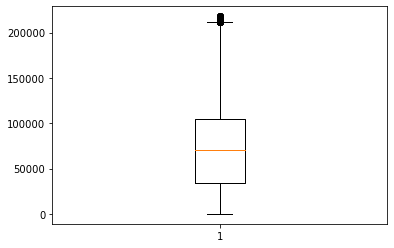

In [14]:
plt.boxplot(visa_df["prevailing_wage_new"])
plt.show()

**np.where**

In [16]:
path=r"C:\Users\veeranna\DATA SCIENCE\Data_sets\Visadataset.xlsx"
visa_df=pd.read_excel(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513.0,2007.0,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444.0,2008.0,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98.0,1897.0,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082.0,2005.0,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601.0,2008.0,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274.0,2006.0,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121.0,1910.0,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918.0,1887.0,West,86154.7700,Year,Y,Certified


In [ ]:
- above replace one we use a traditional approch
- for loop,list,
- the same we can get using np.where

In [21]:
dict1={"name":["A","B","c","D"],
     "num":[1,2,3,4]}
d=pd.DataFrame(dict1)

np.where(con,True,False)
- will take 3 arguments
  - condition
      -con=d["num"]>2
  - True value
      -t=100
  - False value
      -f=d["num"]


In [23]:
l=np.where(d["num"]>2,100,d["num"])
d["num"]=l
d

,name,num
0,A,1
1,B,2
2,c,100
3,D,100


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path=r"C:\Users\veeranna\DATA SCIENCE\Data_sets\Visadataset.xlsx"
visa_df=pd.read_excel(path)
elist=[]
median=np.median(visa_df["prevailing_wage"])
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q3=np.percentile(visa_df["prevailing_wage"],75)
IQR=Q3-Q1
bl=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
# c1=visa_df["prevailing_wage"]<bl
# c2=visa_df["prevailing_wage"]>ub
np.where(visa_df["prevailing_wage"]<bl | visa_df["prevailing_wage"]>ub,median,visa_df["prevailing_wage"])
visa_df["prevailing_wage_new"]=np.where(visa_df["prevailing_wage"]<bl | visa_df["prevailing_wage"]>ub,median,visa_df["prevailing_wage"])  
visa_df["prevailing_wage_new"]

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

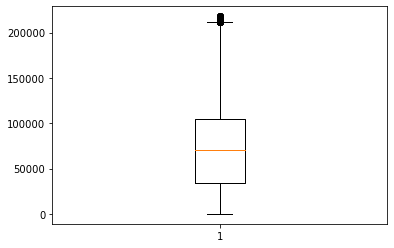

In [7]:
median=np.median(visa_df["prevailing_wage"])
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q3=np.percentile(visa_df["prevailing_wage"],75)
IQR=Q3-Q1
bl=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
# c1=visa_df["prevailing_wage"]<bl
# c2=visa_df["prevailing_wage"]>ub
c1=visa_df["prevailing_wage"]<bl
c2=visa_df["prevailing_wage"]>ub
con=c1|c2
t=median
f=visa_df["prevailing_wage"]

visa_df["prevailing_wage_new"]=np.where(con,t,f)
#visa_df["prevailing_wage_new"]
plt.boxplot(visa_df["prevailing_wage_new"])
plt.show()